<a href="https://colab.research.google.com/github/kjh1696/DeepLearning/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

# case 1
N = 20
random0 = torch.randn(int(N/2),1)
random5 = torch.randn(int(N/2),1) + 5

class1_data = torch.hstack([random0, random5]) # (0,5) 근처로 데이터를 생성
class2_data = torch.hstack([random5, random0]) # (5,0) 근처로 데이터를 생성

class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)

X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

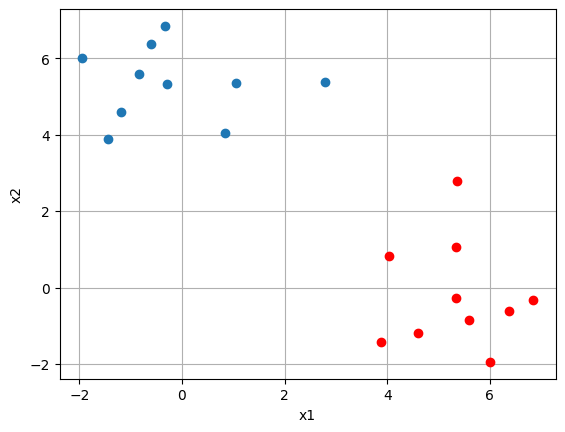

In [4]:
import matplotlib.pyplot as plt

plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [28]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    # case 1, plain
    self.linear = nn.Sequential(nn.Linear(2, 1000),nn.Sigmoid(),
                                nn.Linear(1000,1), nn.Sigmoid())

    # # case 1, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

    # # case1, deep
    # self.linear = nn.Sequential(nn.Linear(2,100), nn.Sigmoid(),
    #                             nn.Linear(100,100), nn.Sigmoid(),
    #                             nn.Linear(100,100), nn.Sigmoid(),
    #                             nn.Linear(100,1), nn.Sigmoid())

    # # case 2, plain
    # self.linear = nn.Sequential(nn.Linear(2,100), nn.Sigmoid(),
    #                             nn.Linear(100,1), nn.Sigmoid)

    # # case 2, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), nn.Sigmoid)

    # # case 2, deep
    # self.linear = nn.Sequential(nn.Linear(2,100), nn.Sigmoid(),
    #                             nn.Linear(100,100),nn.Sigmoid(),
    #                             nn.Linear(100,100), nn.Sigmoid(),
    #                             nn.Linear(100,1), nn.Sigmoid())


  def forward(self, x):
    x = self.linear(x)
    return x

In [29]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 데이터의 개수를 의미 (5)
print(model(torch.randn(5,2)))

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=1000, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=1000, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])
tensor([[0.5243],
        [0.5131],
        [0.5353],
        [0.4989],
        [0.5164]], grad_fn=<SigmoidBackward0>)


In [34]:
from torch import optim
LR = 1e-2
EPOCH = 100

optimizer = optim.Adam(model.parameters(), lr = LR)
criterion = nn.BCELoss()

loss_history = []

model.train()
for ep in range(EPOCH):
  # inference
  y_hat = model(X)
  # loss
  loss = criterion(y_hat, y)
  #update
  optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
  loss.backward() # backpropagation
  optimizer.step() # weight update

  # print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
  print("-"*20)

Epoch: 1, train loss: 0.6935
--------------------
Epoch: 2, train loss: 0.2067
--------------------
Epoch: 3, train loss: 0.0411
--------------------
Epoch: 4, train loss: 0.0307
--------------------
Epoch: 5, train loss: 0.0229
--------------------
Epoch: 6, train loss: 0.0142
--------------------
Epoch: 7, train loss: 0.0079
--------------------
Epoch: 8, train loss: 0.0042
--------------------
Epoch: 9, train loss: 0.0023
--------------------
Epoch: 10, train loss: 0.0013
--------------------
Epoch: 11, train loss: 0.0008
--------------------
Epoch: 12, train loss: 0.0005
--------------------
Epoch: 13, train loss: 0.0004
--------------------
Epoch: 14, train loss: 0.0003
--------------------
Epoch: 15, train loss: 0.0003
--------------------
Epoch: 16, train loss: 0.0002
--------------------
Epoch: 17, train loss: 0.0002
--------------------
Epoch: 18, train loss: 0.0002
--------------------
Epoch: 19, train loss: 0.0002
--------------------
Epoch: 20, train loss: 0.0002
----------

Text(0.5, 0.5, 'x2')

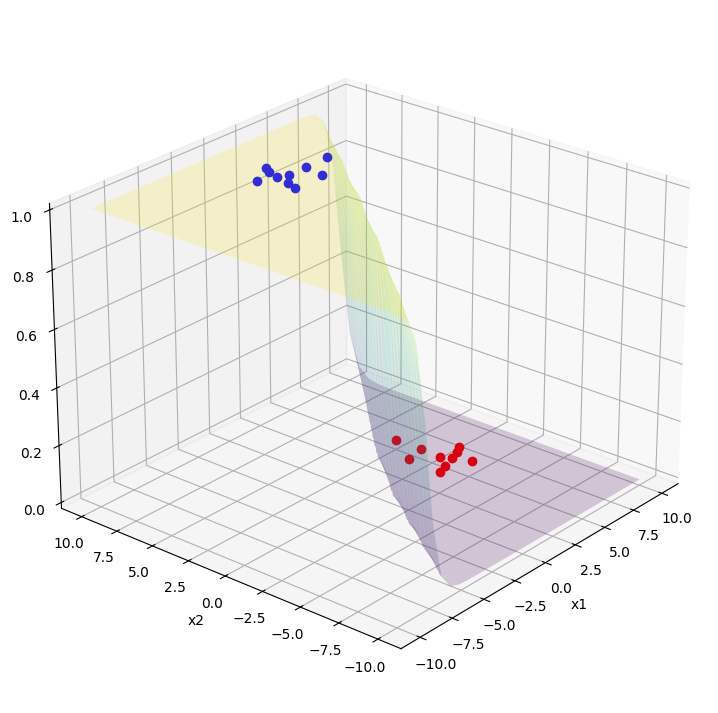

In [35]:
x1_test = torch.linspace(-10, 10, 30) # case 1
x2_test = torch.linspace(-10, 10, 30) # case 1

X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

model.eval() # set로 사용해야함
with torch.no_grad():
  y_hat=model(X_test)

Y_hat = y_hat.squeeze()

plt.figure(figsize = [10,9])
ax = plt.axes(projection = "3d")
ax.view_init(elev = 25, azim = -140)

ax.plot_surface(X1_test, X2_test, Y_hat.numpy(), cmap = "viridis", alpha = 0.2)

plt.plot(class1_data[:,0], class1_data[:,1], class1_label.squeeze(), 'bo')
plt.plot(class2_data[:,0], class2_data[:,1], class2_label.squeeze(), 'ro')

plt.xlabel("x1")
plt.ylabel("x2")